# DS520 Final Project- SkinCancer Detection using EfficientNet-B5 CNN Model

In [ ]:
!pip install tensorflow keras efficientnet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.2 MB/s eta 0:00:00


In [ ]:
import zipfile
import os

# Define the paths to your ZIP files
TRAIN_ZIP = "/content/ISIC_Training_Input.zip"
TEST_ZIP = "/content/ISIC_Test_input.zip"

# Define the output directories
TRAIN_IMAGES = "/content/ISIC_2019_Training_Input/"
TEST_IMAGES = "/content/ISIC_2019_Test_Input/"

# Extract training images
with zipfile.ZipFile(TRAIN_ZIP, 'r') as zip_ref:
    zip_ref.extractall(TRAIN_IMAGES)

# Extract test images
with zipfile.ZipFile(TEST_ZIP, 'r') as zip_ref:
    zip_ref.extractall(TEST_IMAGES)

# Check if extraction was successful
print("Training images extracted:", len(os.listdir(TRAIN_IMAGES)))
print("Test images extracted:", len(os.listdir(TEST_IMAGES)))


Training images extracted: 1
Test images extracted: 1


In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split

isic_path = 'isic_preproc/ISIC_2019_Training_Input'
def get_isic_df():
    df = pd.read_csv('ISIC_2019_Training_GroundTruth.csv')
    path_img = 'ISIC_2019_Training_Input/ISIC_Training_Input'

    for label in df.columns[1:]:
        df.loc[df[label] == 1.0, 'label'] = label

    df.rename(columns={'image': 'name'}, inplace=True)
    df['name'] = df['name'].apply(lambda x: "{}/{}.jpg".format(isic_path,x))
    df = df[['name', 'label']]
    return df

In [ ]:
get_isic_df()

,name,label
0,isic_preproc/ISIC_2019_Training_Input/ISIC_000...,NV
1,isic_preproc/ISIC_2019_Training_Input/ISIC_000...,NV
2,isic_preproc/ISIC_2019_Training_Input/ISIC_000...,MEL
3,isic_preproc/ISIC_2019_Training_Input/ISIC_000...,NV
4,isic_preproc/ISIC_2019_Training_Input/ISIC_000...,MEL
...,...,...
25326,isic_preproc/ISIC_2019_Training_Input/ISIC_007...,BCC
25327,isic_preproc/ISIC_2019_Training_Input/ISIC_007...,BKL
25328,isic_preproc/ISIC_2019_Training_Input/ISIC_007...,MEL
25329,isic_preproc/ISIC_2019_Training_Input/ISIC_007...,NV


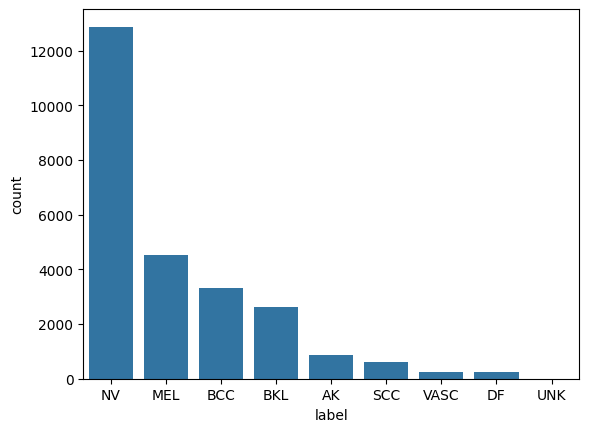

In [ ]:
import seaborn as sns
ax = sns.countplot(x="label", data=get_isic_df(), order=['NV', 'MEL', 'BCC', 'BKL', 'AK', 'SCC', 'VASC', 'DF','UNK'])

In [ ]:
isic_test_path = 'isic_preproc/ISIC_2019_Test_Input'
def get_isic_test_df():
    df = pd.read_csv('ISIC_2019_Test_Metadata.csv', usecols=['image'])
    path_test_img = 'ISIC_2019_Test_Input/ISIC_Test_Input'
    df.rename(columns={'image': 'name'}, inplace=True)
    return df

In [ ]:
get_isic_test_df()

,name
0,ISIC_0034321
1,ISIC_0034322
2,ISIC_0034323
3,ISIC_0034324
4,ISIC_0034325
...,...
8233,ISIC_0073236
8234,ISIC_0073243
8235,ISIC_0073250
8236,ISIC_0073252


In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split

# Define paths to the dataset
TRAIN_LABELS = "/content/ISIC_2019_Training_GroundTruth.csv"  # Training labels file
TEST_LABELS = "/content/ISIC_2019_Test_Metadata.csv"          # Testing labels file
TRAIN_IMAGES = "/content/ISIC_2019_Training_Input/ISIC_Training_Input/"           # Directory containing training images
TEST_IMAGES = "/content/ISIC_2019_Test_Input/ISIC_Test_Input/"                # Directory containing testing images

# Load the CSV files
train_df = pd.read_csv(TRAIN_LABELS)
test_df = pd.read_csv(TEST_LABELS)

# Split the training data into training and validation sets
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=42)

# Confirm the splits
print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")
print(f"Testing samples: {len(test_df)}")

# Add full image paths to the DataFrame
train_df['image_path'] = train_df['image'].apply(lambda x: os.path.join(TRAIN_IMAGES, f"{x}.jpg"))
test_df['image_path'] = test_df['image'].apply(lambda x: os.path.join(TEST_IMAGES, f"{x}.jpg"))
val_df['image_path'] = val_df['image'].apply(lambda x: os.path.join(TRAIN_IMAGES, f"{x}.jpg"))
print(train_df.head())


Training samples: 22797
Validation samples: 2534
Testing samples: 8238
                          image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK  \
12981              ISIC_0053550  0.0  0.0  1.0  0.0  0.0  0.0   0.0  0.0  0.0   
18808              ISIC_0062911  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
12783              ISIC_0034186  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0   
1595   ISIC_0012945_downsampled  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
9125               ISIC_0030528  0.0  0.0  1.0  0.0  0.0  0.0   0.0  0.0  0.0   

                                              image_path  
12981  /content/ISIC_2019_Training_Input/ISIC_Trainin...  
18808  /content/ISIC_2019_Training_Input/ISIC_Trainin...  
12783  /content/ISIC_2019_Training_Input/ISIC_Trainin...  
1595   /content/ISIC_2019_Training_Input/ISIC_Trainin...  
9125   /content/ISIC_2019_Training_Input/ISIC_Trainin...  


In [ ]:
# Check the first few paths in the DataFrame
print(train_df['image_path'].head())

12981    /content/ISIC_2019_Training_Input/ISIC_Trainin...
18808    /content/ISIC_2019_Training_Input/ISIC_Trainin...
12783    /content/ISIC_2019_Training_Input/ISIC_Trainin...
1595     /content/ISIC_2019_Training_Input/ISIC_Trainin...
9125     /content/ISIC_2019_Training_Input/ISIC_Trainin...
Name: image_path, dtype: object


In [ ]:
print(train_df.columns[1:])


Index(['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK',
       'image_path'],
      dtype='object')


In [ ]:
# Count the number of classes in the training dataset
num_classes = len(train_df.columns[1:])
print(f"Number of classes in the dataset: {num_classes}")


Number of classes in the dataset: 10


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Map label indices to class names (modify as per your dataset's label mapping)
# class_names = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']

# # Visualize the first 9 images in the batch
# plt.figure(figsize=(12, 12))
# for i in range(8):  # Display up to 9 images
#     plt.subplot(3, 3, i + 1)
#     plt.imshow(TRAIN_IMAGES[i])  # Show the image
#     label_index = np.argmax(TRAIN_LABELS[i])  # Convert one-hot encoded label to class index
#     plt.title(f"Class: {class_names[label_index]}")
#     plt.axis('off')  # Hide axes

# plt.tight_layout()
# plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 456  # Required input size for EfficientNet-B5
BATCH_SIZE = 32  # Adjust based on available GPU memory

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,        # Normalize pixel values
    rotation_range=20,        # Random rotation
    width_shift_range=0.2,    # Random horizontal shift
    height_shift_range=0.2,   # Random vertical shift
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Random horizontal flip
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Only normalization for testing
test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Only normalization for testing


In [ ]:
# Define the label columns explicitly
label_columns = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']

train_df_sampled = train_df.iloc[:int(0.2 * len(train_df))]

# Update the train_generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="image_path",      # Column containing image file paths
    y_col=label_columns,     # Only include the label columns
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="raw"         # Use raw labels for one-hot encoding
)

# Update the test_generator (if applicable)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="image_path",      # Column containing image file paths
    y_col=None,              # No labels for test set
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode=None          # No labels for inference
)

# Validation data generator
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="image_path",
    y_col=label_columns,  # Label columns
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="raw"
)


Found 3486 validated image filenames.
Found 0 validated image filenames.
Found 362 validated image filenames.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 19311 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 8238 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2172 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
# Check a batch of data
batch = next(iter(train_generator))
print("Batch image shape:", batch[0].shape)  # Shape of the images
print("Batch label shape:", batch[1].shape)  # Shape of the labels

# Ensure label shape matches the number of classes (9)
assert batch[1].shape[1] == len(label_columns), "Label shape mismatch!"


Batch image shape: (32, 456, 456, 3)
Batch label shape: (32, 9)


In [ ]:
# Fetch a batch from the train generator
batch_images, batch_labels = next(train_generator)
print(f"Batch image shape: {batch_images.shape}")
print(f"Batch label shape: {batch_labels.shape}")


Batch image shape: (32, 456, 456, 3)
Batch label shape: (32, 9)


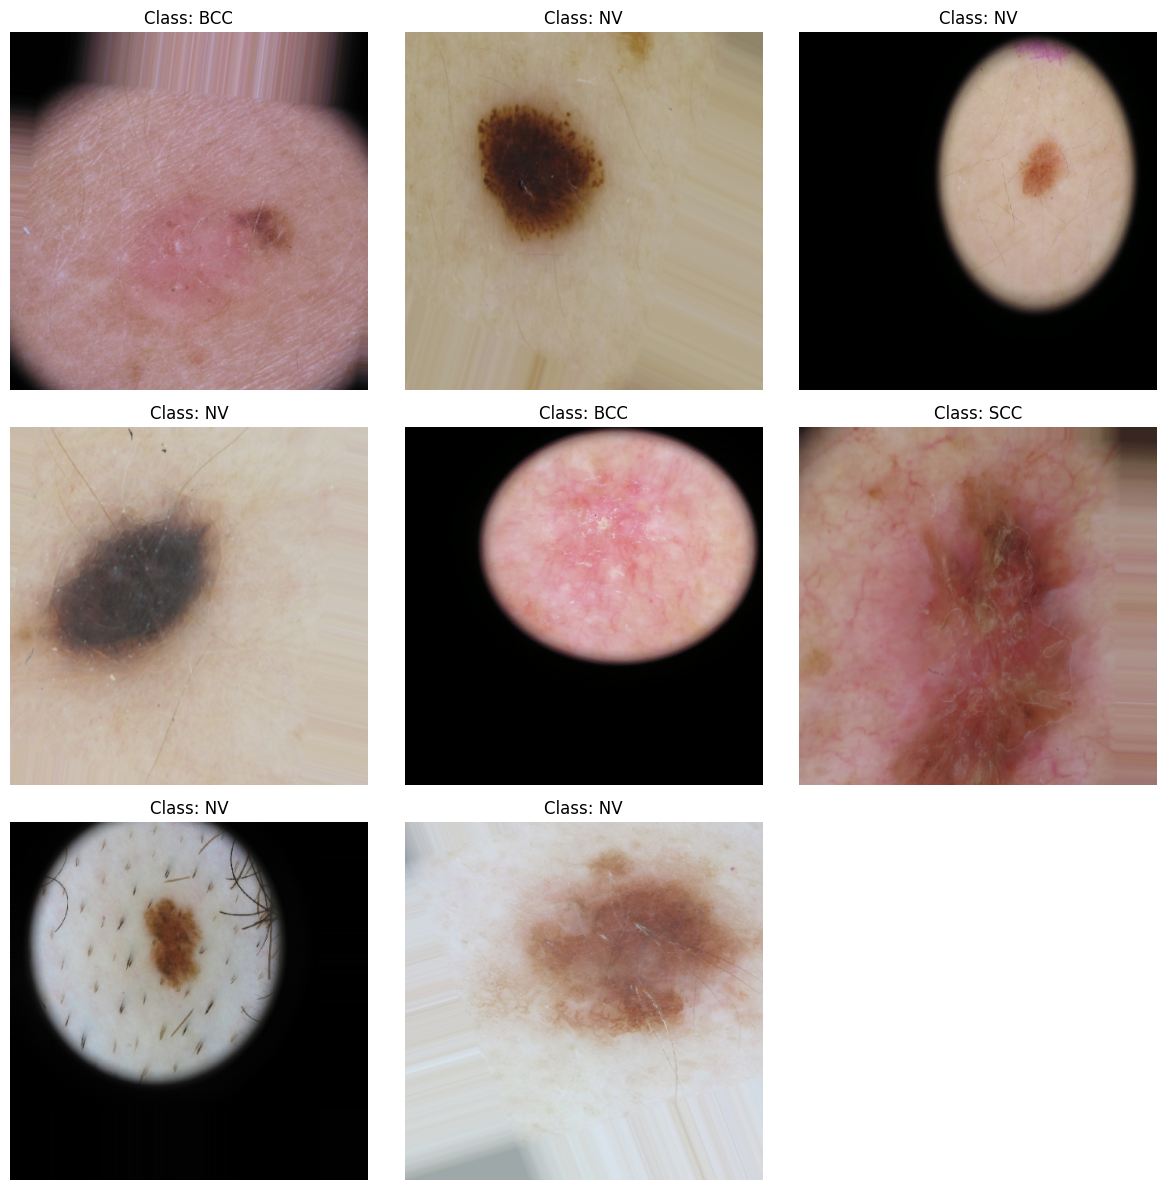

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Map label indices to class names (modify as per your dataset's label mapping)
class_names = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']

# Visualize the first 9 images in the batch
plt.figure(figsize=(12, 12))
for i in range(8):  # Display up to 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(batch_images[i])  # Show the image
    label_index = np.argmax(batch_labels[i])  # Convert one-hot encoded label to class index
    plt.title(f"Class: {class_names[label_index]}")
    plt.axis('off')  # Hide axes

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.applications import EfficientNetB5
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load pre-trained EfficientNet-B5 base model
base_model = EfficientNetB5(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze the base model's layers
base_model.trainable = False

# Add custom classification head
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Reduces spatial dimensions while preserving information
    Dropout(0.5),              # Reduces overfitting
    Dense(128, activation='relu'),  # Fully connected layer
    Dropout(0.5),
    Dense(len(label_columns), activation='softmax')  # Output layer  # Use len(label_columns) for dynamic output size
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),  # Optimizer with a low learning rate for transfer learning
    loss="categorical_crossentropy",    # Suitable for multi-class classification
    metrics=["accuracy"]
)


115263384/115263384 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Check the first batch of data from the train generator
batch = next(iter(train_generator))
print("Train batch shapes:")
print(f"Images shape: {batch[0].shape}")  # Shape of images
print(f"Labels shape: {batch[1].shape}")  # Shape of labels

# Check the first batch of data from the test generator
test_batch = next(iter(test_generator))
print("Test batch shape:")
print(f"Images shape: {test_batch.shape}")  # Shape of images


Train batch shapes:
Images shape: (32, 456, 456, 3)
Labels shape: (32, 9)
Test batch shape:
Images shape: (0, 456, 456, 3)


In [ ]:
# Test preprocessing and loading
sample_image = train_df.iloc[22600]["image_path"]
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load and preprocess a single image
img = load_img(sample_image, target_size=(IMG_SIZE, IMG_SIZE))
img_array = img_to_array(img) / 255.0  # Normalize
print(f"Image shape: {img_array.shape}")


Image shape: (456, 456, 3)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks for training
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
# model_checkpoint = ModelCheckpoint("efficientnetb5_isic.h5", save_best_only=True, monitor="val_loss")
model_checkpoint = ModelCheckpoint("efficientnetb5_isic.keras", save_best_only=True, monitor="val_loss")


# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[early_stopping, model_checkpoint],
    validation_freq=2  # Validate less frequently
)


Epoch 1/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.3271 - loss: 1.7198
Epoch 2/5


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3145 - loss: 1.7116

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


109/109 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - accuracy: 0.3145 - loss: 1.7116 - val_accuracy: 0.3177 - val_loss: 1.6836
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.2929 - loss: 1.7246
Epoch 4/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 274s 2s/step - accuracy: 0.3236 - loss: 1.7021 - val_accuracy: 0.3177 - val_loss: 1.6837
Epoch 5/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.3257 - loss: 1.7044


In [ ]:
### Updating tha batchsize and image size which requires less memory. and avid the ResourceExhaustedError

In [ ]:
# Define the label columns explicitly
label_columns = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']

train_df_sampled = train_df.iloc[:int(0.4 * len(train_df))]

IMG_SIZE = 224  # Reduce image size
BATCH_SIZE = 16  # or 8, or even 4 if necessary

# Update the train_generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="image_path",      # Column containing image file paths
    y_col=label_columns,     # Only include the label columns
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="raw"         # Use raw labels for one-hot encoding
)

# Update the test_generator (if applicable)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="image_path",      # Column containing image file paths
    y_col=None,              # No labels for test set
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode=None          # No labels for inference
)

# Validation data generator
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="image_path",
    y_col=label_columns,  # Label columns
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="raw"
)


In [ ]:
# Unfreeze the base model
base_model.trainable = True


# Recompile with a smaller learning rate
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Fine-tune the model
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/10


In [ ]:
loss, accuracy = model.evaluate(train_generator)
print(f"Train Loss: {loss}, Train Accuracy: {accuracy}")

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


In [ ]:
import numpy as np

# Predict classes
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)
